In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

%matplotlib inline
df = pd.read_csv("book_depository2.csv", sep=",")
df.head()
df


/Users/killahnatko/opt/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#remove stopwords and puncutation 
nltk_stopwords = stopwords.words('english')+list(string.punctuation)
#l'application de countvectorizer, metter en minuscle, application des stopwords
bow1 = CountVectorizer(lowercase=True, stop_words=nltk_stopwords, 
                                   min_df=0.01)
#pass through algorithm
bow1.fit(df['description'].values.astype('U'))
# Vocabulaire final : dimensions of vectors
print(len(bow1.vocabulary_))


/Users/killahnatko/opt/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


735


/Users/killahnatko/opt/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('book', 1729), ('new', 1642), ('one', 1355), ('world', 1242), ('work', 1241), ('history', 1054), ('life', 990), ('first', 985), ('planet', 937), ('also', 864)]


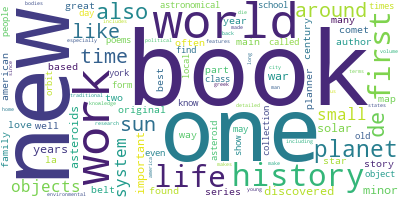

In [28]:

#find vocab
vocab = bow1.get_feature_names()
# bag of words transformation 
descriptions_bow = bow1.transform(df['description'].values.astype('U'))

frequencies = Counter()
for i, tok in enumerate(vocab):
    frequencies[tok] = descriptions_bow.getcol(i).sum()
print(frequencies.most_common(10))

#create top 10 words 
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies)
wordcloud.to_image()
#les mots fréquents soulignent la catégorie la plus fréquente qui est 
#l'Histoire des Américains et aussi l'autre catégorie populaire de l'astronomie. 

In [30]:
#thematic analysis 
from gensim.matutils import Sparse2Corpus
from gensim.models.ldamodel import LdaModel

# bag of words 
corpus_bow = Sparse2Corpus(descriptions_bow, documents_columns=False)
# create dictionary to associate each words
id_2_word_dict = {i:vocab[i] for i in range(len(vocab))}
# LDA estimation 

lda_model = LdaModel(corpus=corpus_bow, 
                     id2word=id_2_word_dict, 
                     num_topics=4, chunksize=250, 
                     passes=10, per_word_topics=True,
                     random_state=40)
# get topics
all_topics = lda_model.print_topics(num_words=20)

for idx, topic in all_topics:
    print(f"Topic: {idx} \nWords: {topic}\n")
#fidn frequent words

import pyLDAvis
import pyLDAvis.gensim_models
from gensim.corpora.dictionary import Dictionary

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_bow, 
                                     Dictionary.from_corpus(corpus_bow, id_2_word_dict),
                                     sort_topics=False)
#visual of output

pyLDAvis.save_html(vis, 'book_depository2_lda.html')

/Users/killahnatko/opt/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.053*"small" + 0.038*"class" + 0.037*"called" + 0.034*"die" + 0.033*"der" + 0.032*"discovered" + 0.028*"sun" + 0.025*"planet" + 0.024*"objects" + 0.023*"system" + 0.021*"und" + 0.021*"solar" + 0.019*"minor" + 0.017*"main" + 0.016*"asteroids" + 0.016*"star" + 0.016*"based" + 0.015*"bodies" + 0.014*"traditional" + 0.013*"around"

Topic: 1 
Words: 0.029*"history" + 0.026*"book" + 0.022*"war" + 0.014*"first" + 0.014*"american" + 0.014*"new" + 0.012*"world" + 0.010*"century" + 0.010*"years" + 0.008*"many" + 0.008*"well" + 0.008*"political" + 0.008*"one" + 0.008*"america" + 0.008*"also" + 0.007*"early" + 0.007*"events" + 0.006*"state" + 0.006*"states" + 0.006*"volume"

Topic: 2 
Words: 0.049*"work" + 0.042*"planner" + 0.040*"map" + 0.034*"original" + 0.025*"important" + 0.021*"cover" + 0.021*"2020" + 0.021*"weekly" + 0.021*"great" + 0.021*"features" + 0.020*"section" + 0.020*"interest" + 0.020*"lovers" + 0.020*"gift" + 0.020*"vintage" + 0.020*"local" + 0.020*"detailed" + 0.

/Users/killahnatko/opt/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('one', 130), ('new', 124), ('murder', 114), ('killer', 79), ('life', 75), ('series', 74), ('crime', 69), ('detective', 69), ('dead', 62), ('find', 62)]


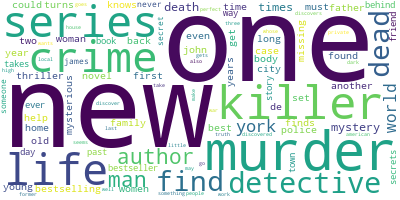

In [32]:
#top words in each category  
nltk_stopwords = stopwords.words('english')+list(string.punctuation)
#apply countvecorizer
bow = CountVectorizer(lowercase=True, stop_words=nltk_stopwords, min_df=0.01)

bow.fit(df['description'].values.astype('U'))
crime = bow.transform(df[df.category=='Crime'].description)

# get vocab
feat_names = bow.get_feature_names()
frequencies = Counter()
#loop through 
for i, tok in enumerate(feat_names):
    frequencies[tok] = crime.getcol(i).sum()
print(frequencies.most_common(10))
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies)
wordcloud.to_image()
